# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

# Central Limit Theorem

# Estimate population mean and standard deviation from sample


To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [2]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Medical charge data set

In [3]:
med_charges = pd.read_csv('data/insurance2.csv')

In [4]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
med_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [6]:

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [7]:
np.random.seed(47)
N_rep = 10000

m_charges = med_charges.charges
m_charges_mean = np.mean(m_charges)
bs_mean_reps = draw_bs_reps(m_charges, np.mean, N_rep)

print('The mean medical charge is $', m_charges_mean)
print('The 95% confidence interval lower limit is ', np.percentile(bs_mean_reps, 5))



The mean medical charge is $ 13270.422265141257
The 95% confidence interval lower limit is  12724.467921704


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__ Null hypothesis: There is no difference between the standard deviations of insurance and non-insurance claim charges (the difference in standard deviations is zero).
Alternative hypothesis: There is a difference between the standard deviations of insurance and non-insurance claim charges (the difference in standard deviations is greater than zero).

In [8]:
# Subset the data; insured, non_ins
insured = med_charges[med_charges.insuranceclaim == 1].charges
non_ins = med_charges[med_charges.insuranceclaim == 0].charges

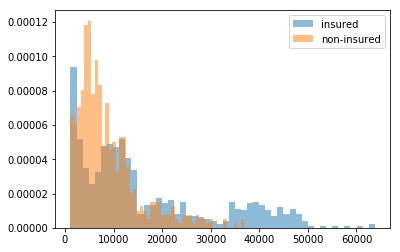

In [9]:
# Histograms of insured vs. non-insured charges

plt.hist(insured, bins=50, normed=True, alpha=0.5)
plt.hist(non_ins, bins=50, normed=True, alpha=0.5)
plt.legend(['insured', 'non-insured'], loc='upper right')

In [10]:
def diff_of_sd(x, y):
    """Find difference in standard deviations."""

    # Set up array of indices to sample from: inds
    diff = np.std(x) - np.std(y)

    return diff

In [11]:
print('The standard deviation of insured charges is ', np.std(insured))
print('The standard deviation of non-insured charges is ', np.std(non_ins))

sd_diff_obs = diff_of_sd(insured, non_ins)

print('The observed difference in standard deviation for this data set is ', sd_diff_obs)

The standard deviation of insured charges is  14036.956250260411
The standard deviation of non-insured charges is  6440.699841605233
The observed difference in standard deviation for this data set is  7596.256408655178


In [12]:
# Bootstrap replicates of standard deviation
ins_bs_reps = draw_bs_reps(insured, np.std, 10000)
non_ins_bs_reps = draw_bs_reps(non_ins, np.std, 10000)

# Find the difference
diff_reps = ins_bs_reps - non_ins_bs_reps

In [13]:
diff_reps

array([7517.27529227, 7589.57190776, 6908.66472585, ..., 7691.9185239 ,
       8290.78426488, 7252.39471188])

In [14]:
llimit, ulimit = np.percentile(diff_reps, [2.5, 97.5])
print(llimit, ulimit)

6670.017989970309 8504.748683311302


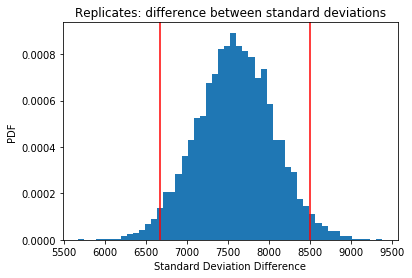

In [15]:
plt.hist(diff_reps, bins=50, normed=True)
plt.title('Replicates: difference between standard deviations')
plt.xlabel('Standard Deviation Difference')
plt.ylabel('PDF')
plt.axvline(llimit, color='red')
plt.axvline(ulimit, color='red')

Because the observed standard deviation from this data set is about 7596, and falls within the 95% confidence interval [6698.2, 8495.3], the observed difference in standard deviations is likely to be accurate. We should reject the null hypothesis because zero is outside of the 95% confidence interval, and conclude that the insured and non-insured charges have different standard deviations. 

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

Null hypothesis: There is no difference between the means of insurance and non-insurance charges (the difference = 0).
Alternative hypothesis: There is a difference between the means of insurance and non-insurance charges (the difference is greater than 0).

In [16]:
# The observed difference between the means of insured and non-insured charges
obs_diff = np.mean(insured) - np.mean(non_ins)
print('The observed difference of means is $', round(obs_diff,2))

The observed difference of means is $ 7602.51


In [17]:
# Find the mean of all charges; total_mean
total_mean = np.mean(m_charges)
print('The mean of all charges is $', round(total_mean,2))

The mean of all charges is $ 13270.42


In [18]:
# Shift the means of insured and non-insured data, and make their means equal to total_mean.
ins_shifted = insured - np.mean(insured) + total_mean
non_ins_shifted = non_ins - np.mean(non_ins) + total_mean

In [19]:
# Bootstrap replicates of means
bs_ins_means = draw_bs_reps(ins_shifted, np.mean, 10000)
bs_non_ins_means = draw_bs_reps(non_ins_shifted, np.mean, 10000)

# The bootstrapped difference of means
bs_dom = bs_ins_means - bs_non_ins_means


In [20]:
pval = np.sum(bs_dom >= obs_diff) / len(bs_dom)
pval

0.0

We get a p-value of 0, this means that none of the bootstrap replicates were as extreme as the observed difference of means. Because the p-value of 0 < 0.05, we should reject the null hypothesis and conclude that there is a significant difference between the means of insured and non-insured charges.

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__ We would get two lines, because we don't know if the mean from insured charges is greater or less than the mean from non-insured charges. In this case, with the way I wrote the code, if the mean of the insured charges is greater that the mean of non-insured charges, then the difference will be positive. However, if the mean of the insured charges is less than the mean of the non-insured charges, then the difference will be negative. 

Text(0,0.5,'Frequency')

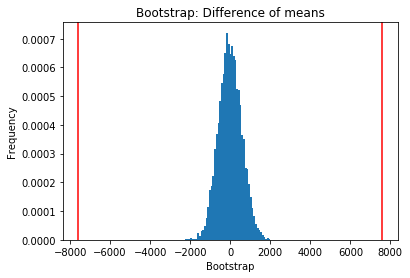

In [22]:
plt.hist(bs_dom, bins=50, normed=True)
plt.axvline(obs_diff, color='red')
plt.axvline(-obs_diff, color='red')
plt.title('Bootstrap: Difference of means')
plt.xlabel('Bootstrap')
plt.ylabel('Frequency')

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ In the previous assignment, the p-value from the t-test function was 4.090550214373795e-31, which is very close to zero. The p-values from the t-test and bootstrapping are about the same. We already simulated 10000 replicates, and the observed difference is very far from even the highest bootstrap replicate, therefore we shouldn't need to perform more bootstrap replicates.

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ I would use the function scipy.stats.ttest_ind_from_stats, with equal_var=False. The insured and non-insured charges are two independent samples, but with different sample variances.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ No, I wouldn't perform a two-sided test as because we only want to know if the click-through rates are different. Null hypothesis: A and B have the same click-through rate; the difference of click-through rates of A and B = 0. Alternative hypothesis: The click-through rate of B is greater than the click-through rate of A. If we rejected the null hypothesis and found that the click-through rates of B were significantly greater than the click-through rates of A, I would recommend changing to the new algorithm.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.